# Perlin zaj - körvonal

Digitális képalkotásnál nagy szerepet kap a véletlen. Ebben a fejezetben egy egyszerű körvonal manipulálásán keresztül fogjuk bemutatni a véletlen számok és Perlin zaj közti különbséget.

<b>Forrás: </b>{cite:p}`moussa_1`

## Szükséges könyvtárak telepítése és importálása

In [1]:
# %pip install noise
# %pip install nbformat
# %pip install numpy
# %pip install matplotlib

In [2]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import noise

## Kép és <code>ImageDraw.draw</code> objektum létrehozása

In [3]:
# paraméterek
image_width = 400
image_height = 400
frame = 50
width = 1
outline = "black"
background = "lightgrey"

image = Image.new("RGB", (image_width, image_height), background)
draw = ImageDraw.Draw(image)

## Kép törlése

Kép törlése megoldható egy háttérszínt használó téglalap rajzolásával a vászon méretei alapján.

In [4]:
def resetImage(width, height, bg):
    draw.rectangle([0, 0, width, height], fill=bg)

## Kör kirajzolása pontokkal

A <code>draw.point</code> hátránya, hogy tényleg csak egy pontot rak le, kizárólag kitöltés <code>fill</code> tulajdonsága van, a projekthez hasznos vonalvastagság tulajdonsága nincs.

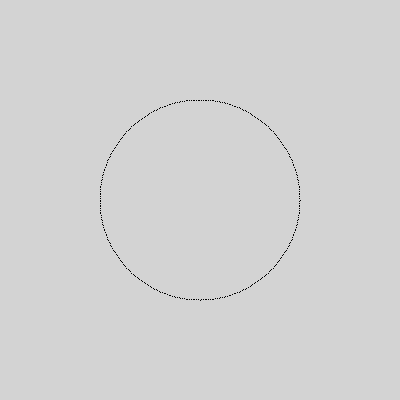

In [5]:
resetImage(400, 400, "lightgrey")

points = 360

for i in range(0, points):
    angle = math.pi * i / (180)
    x = 200 + 100 * math.cos(angle)
    y = 200 + 100 * math.sin(angle)
    draw.point([x, y], fill="black")

display(image)

## Kör kirajzolása ellipszisek segítségével

Az ellipszis már rendelkezik körvonal <code>outline</code> és vonalvastagság <code>width</code> tulajdonságokkal, így PIL könyvtár esetén jobb választás erre a felhasználásra.

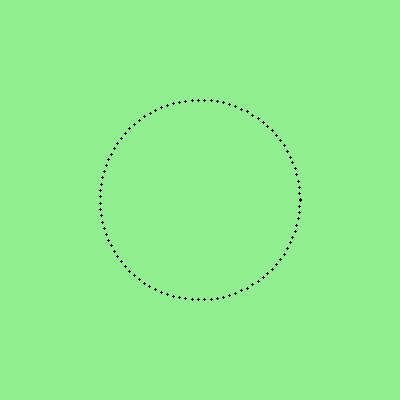

In [17]:
resetImage(400, 400, "lightgreen")

points = 100
steps = np.linspace(0, math.tau, points)

for i in steps:
    x = 200 + 100 * math.cos(i)
    y = 200 + 100 * math.sin(i)
    draw.ellipse([x - 1, y - 1, x + 1, y + 1], fill="black", outline="black", width=2)

display(image)

## Véletlen implementálása és kör torzítása

A ciklus paramétereit ezúttal radiánokban határozzuk meg, ahol &#964; (tau) értéke 2&#960;, azaz ~6,28. Az <code>np.linspace</code> parancs a meghatározott intervallumon egyenletesen elosztott értékeket hoz létre.

In [7]:
def pointsOfCircle(center_x, center_y, radius, num_points):

    list = []
    steps = np.linspace(0, math.tau, num_points)

    for i in steps:
        x = center_x + radius * math.cos(i)
        y = center_y + radius * math.sin(i)
        list.append((x, y))

    return list

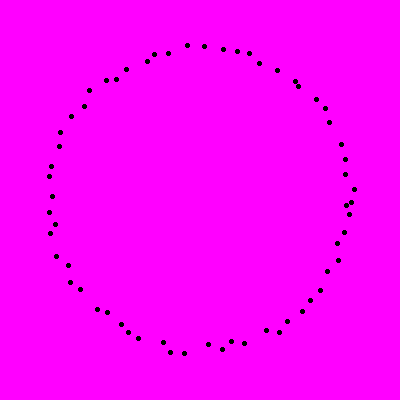

In [8]:
resetImage(400, 400, "magenta")

points = 62
points = pointsOfCircle(200, 200, 150, points)

for element in points:
    n, m = random.randint(-5, 5), random.randint(-5, 5)
    x, y = element[0] + n, element[1] + m

    draw.ellipse([x - 2, y - 2, x + 2, y + 2], fill="black", outline="black", width=2)

display(image)

## Perlin zaj

A Perlin zaj egy mesterséges zajgeneráló algoritmus, amelyet Ken Perlin fejlesztett ki az 1980-as években. Ez az algoritmus mai napig hasznos a számítógépes grafikában, animációban, játékfejlesztésben és egyéb területeken, ahol szükség van természetesnek ható zajok generálására. Lényege, hogy véletlenszerű, de egyenletesen változó értékeket generál olyan módon, hogy azok lágy átmeneteket mutatnak, és emiatt természetesnek hatnak.

Az alábbi paraméterek megadásával tovább lehet pontosítani a kapott mintát:

- Méretarány <b>(scale)</b> - a zaj méretét vagy frekvenciáját szabályozza, befolyásolva a minták méretét.

- Oktávok <b>(octaves)</b> - meghatározza a szintek számát a zajban, ami befolyásolja annak bonyolultságát.

- Tartósság <b>(persistence)</b> - a zajban az egyes oktávok befolyását szabályozza, befolyásolva az átmenetet egyes szintek között.

- Hézagosság <b>(lacunarity)</b> - meghatározza a változások gyakoriságát a zajban, befolyásolva a mintázatok részletességét.

### Egyetlen x,y koordináta meghatározása

In [9]:
def map_noise(x, y):
    resolution = 0.75
    scale = 10

    perlin_noise = noise.pnoise2(x * resolution, y * resolution)
    value = (perlin_noise - 0.5) * 2 * scale
    return value


x = 1
y = 2
result = map_noise(x, y)
print(result)

-8.7060546875


### 1D Perlin zaj értékek meghatározása és vizualizálása

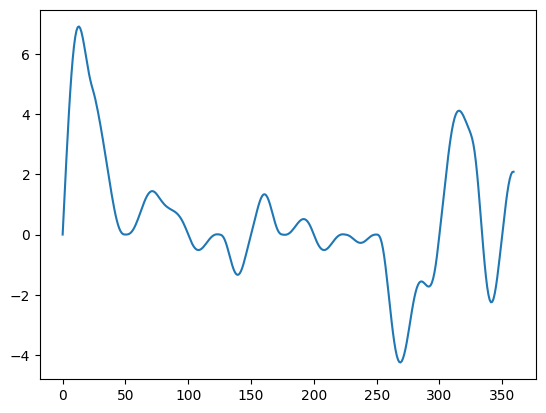

In [10]:
# paraméterek
scale = 10
resolution = 0.02
octaves = 2

x = np.arange(360)
noise_values = (
    np.array([noise.pnoise1(x * resolution, octaves=octaves) for x in x]) * scale
)

fig = plt.plot(noise_values)
display(fig)

1D Perlin zaj értékek és véletlen generált értékek megjelenítése és összehasonlítása:

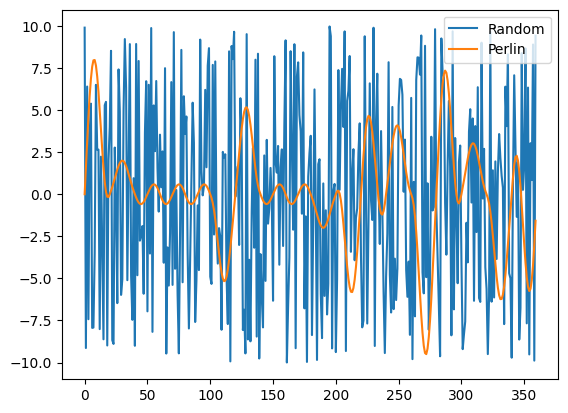

In [11]:
# paraméterek
x = np.arange(360)
y = np.arange(360)
scale = 10
resolution = 0.05
octaves = 1

perlin_values = (
    np.array([noise.pnoise1(x * resolution, octaves=octaves) for x in x]) * scale
)
random_values = np.array([np.random.rand() * 20 - 10 for _ in y])

plt.plot(random_values, label="Random")
plt.plot(perlin_values, label="Perlin")

plt.legend()
plt.show()

### Perlin zajt használó mintakód:

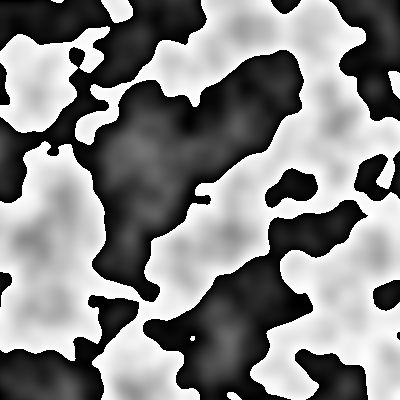

In [12]:
# paraméterek
shape = (400, 400)
scale = 100
octaves = 3
persistence = 0.5
lacunarity = 2.0

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(
            i / scale,
            j / scale,
            octaves=octaves,
            persistence=persistence,
            lacunarity=lacunarity,
        )
imagePerlin = Image.fromarray((world * 255).astype(np.uint8))
display(imagePerlin)

### Véletlen számokat használó mintakód:

A Numpy könyvtár <code>np.random.randint()</code> könyvtára segítságável véletlen számokat generálunk.

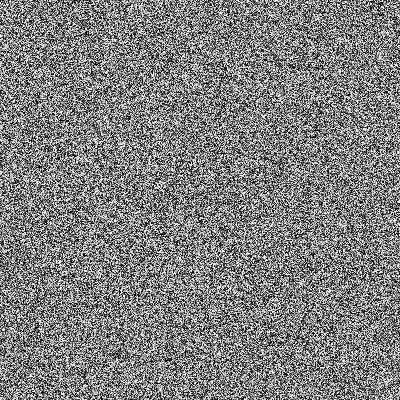

In [13]:
width = 400
height = 400

random_pixels = np.random.randint(0, 256, size=(height, width), dtype=np.uint8)
imageRandom = Image.fromarray(random_pixels, mode="L")

display(imageRandom)

## Kör kirajzolása Perlin zajjal

Körben megjelenített pontok koordinátáinak meghatározása

In [14]:
def pointsCircle(center_x, center_y, radius, num_points):

    list = []
    steps = np.linspace(0, math.tau, num_points)

    for i in steps:
        x = center_x + int(radius * math.cos(i))
        y = center_y + int(radius * math.sin(i))
        list.append((x, y))

    return list

Adott koordinátákhoz tartozó zaj érték meghatározása

In [32]:
def addNoise(x, y):
    resolution = 0.0075
    scale = 10

    perlin_noise = noise.pnoise2(x * resolution, y * resolution)
    value = (perlin_noise - 0.5) * 2 * scale
    return value

A kört alkotó egyes "pontok" (valójában ellipszisek) helyzete és torzításhoz használt zaj megadása segítségével létrehozható a végső alakzat. 

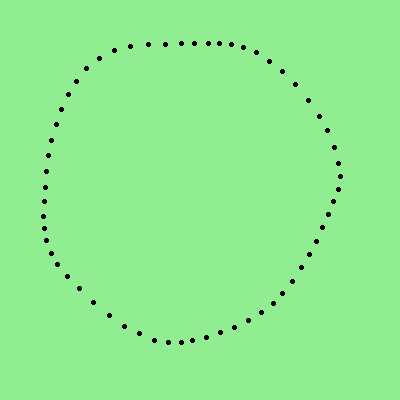

In [33]:
resetImage(400, 400, "lightgreen")

points = 62
elements = pointsCircle(200, 200, 150, points)

for element in elements:
    x, y = element
    x += addNoise(x, y)
    y += addNoise(x, y)

    draw.ellipse([x - 2, y - 2, x + 2, y + 2], fill="black", outline="black", width=2)

display(image)

## Koncentrikus "körök" hozzáadása

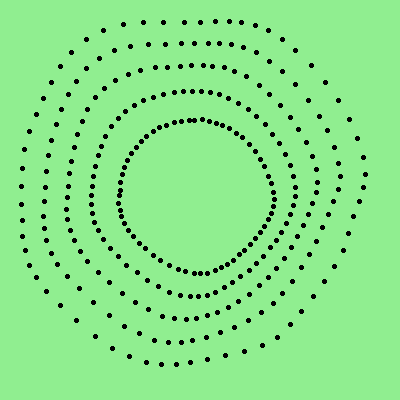

In [34]:
resetImage(400, 400, "lightgreen")


def drawCircle(elements):
    for element in elements:
        x, y = element
        x += addNoise(x, y)
        y += addNoise(x, y)

        draw.ellipse(
            [x - 2, y - 2, x + 2, y + 2], fill="black", outline="black", width=2
        )


points = 62

elements_1 = pointsCircle(200, 200, 175, points)
elements_2 = pointsCircle(200, 200, 150, points)
elements_3 = pointsCircle(200, 200, 125, points)
elements_4 = pointsCircle(200, 200, 100, points)
elements_5 = pointsCircle(200, 200, 75, points)

drawCircle(elements_1)
drawCircle(elements_2)
drawCircle(elements_3)
drawCircle(elements_4)
drawCircle(elements_5)

display(image)